See the parent `Kolumbo_volcano.ipynb` notebook.

#### Notebook setup

In [1]:
# %load /home/kmc3817/software/fullwavepy/fullwavepy/config/jupyter.py
from fullwavepy import * # Load modules imported in fullwavepy/__init__.py
# -----------------------------------------------------------------------------
# Set aliases of frequently used jupyter magic commands
# -----------------------------------------------------------------------------
%alias_magic mi matplotlib -p inline
%alias_magic mn matplotlib -p notebook
# -----------------------------------------------------------------------------
# Set matplotlib backend
# -----------------------------------------------------------------------------
# non-interactive plots displayed in a notebook cell
%matplotlib inline
# interactive plots displayed in a notebook cell
# %matplotlib notebook (interactive version)
# -----------------------------------------------------------------------------
# Set matplotlib style
# ----------------------------------------------------------------------------
plt.style.reload_library()
# a combined style (right overwrites left wherever they overlap):
plt.style.use(['default', 'ggplot'])
# print(plt.style.available) 
# -----------------------------------------------------------------------------
# Configure logging
# -----------------------------------------------------------------------------
# Set up loggers, handlers and load the log_lvl function
from fullwavepy.config.logging import *
# -----------------------------------------------------------------------------
# Set level of log-messages
log_lvl(INFO) 
# Other options in order of increasing importance and 
# decreasing verbosity:
# TRACE, DEBUG, INFO, WARNING, ERROR, CRITICAL
# or using integers: 0, 10, 20, 30, 40, 50, respectively
# -----------------------------------------------------------------------------
# Autocompleting
# -----------------------------------------------------------------------------
#  Not sure if it works
#%config IPCompleter.greedy=True 
# -----------------------------------------------------------------------------
# Automatically reload modules before execution
#%load_ext autoreload
#%autoreload 2


Created `%mi` as an alias for `%matplotlib inline`.
Created `%mn` as an alias for `%matplotlib notebook`.


# Synthetic-data calculation

## Numerical solver

In [2]:
exe_690 = { # Paths to the FWI and preprocessing codes' executables 
    'fullwave':       '~/PhD/fullwave3D/rev690/bin/fullwave3D.exe',
    'fullwave_local': '/home/kmc3817/light_PhD/fullwave3D/rev690/bin/fullwave3D.exe',
    'segyprep':       '/home/kmc3817/light_PhD/fullwave3D/segyprep_v3.16/bin/segyprep_v3.16'
}   

## Discretisation

In [3]:
d01 = dict( # Discretisation of time and space. 
    dt = 0.0025, # s
    ns = 2000,   # - 
    dx = 50,     # m - this should determine choice of the model 
)

## Source wavelet

## Starting model

#### Alg.
Extract from the experiment domain.

In [4]:
%%time 
# Extract from the experiment domain.
bh = A3d(pro.svp['bh']['18-04-24'])
vp = A3d(bh.carve(b01.box))

NameError: name 'pro' is not defined

#### Fig.
Starting model of P-wave velocity from Heath19.

Text(0.5, 1.0, 'Iteration 0')

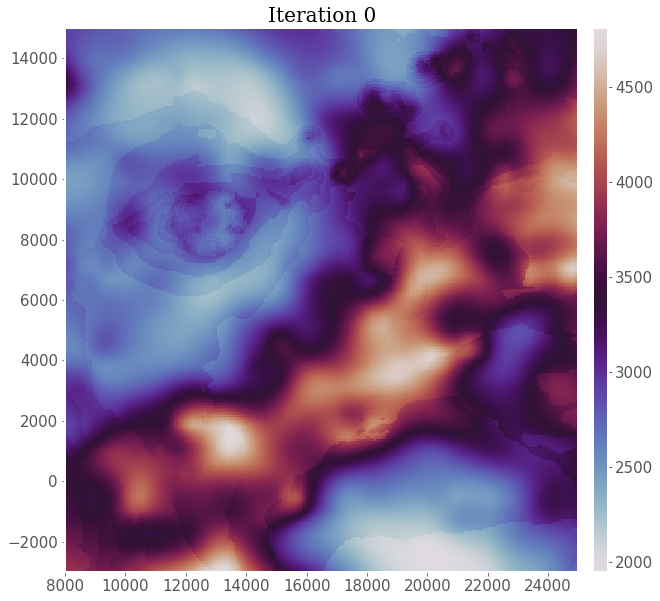

In [101]:
%%time 
lll(40)
font = dict(fontsize=20, fontfamily='serif')
figure(10,10)
_ = A3d(vp).plot(1000, unit='m', axis='z', cmap='twilight', aspect='equal')
# plt.grid()
plt.title('Iteration %s' % 0, **font)

# Synthetic vs. field data

#### Alg. 
Initialise the entire workflow.

In [5]:
lll(20)
f01 = FlowInvObs('f01', path_eph)
f01.run(steps=[0], box=b01.box, **d01, exp='proteus', env={'SLAVES_WAVEFIELDSVTR': -200},#### Alg. 
       precode='sp-316', fwicode='fw3d-690', ibmcode=None)

NameError: name 'FlowInvObs' is not defined

#### Alg. 
Prepare the **synthetic run**.

In [20]:
%%time
f01.run(steps=[1,2], dataset_id=['obshy'], ztype='d', addtodepth=0) # took 13 min

Skipping step 0
Preparing input for the synthetic run...

Warning. Reciprocity set to default - True.


INFO:fullwavepy.project.files.text.misc.RawSeisTxtFile.create: No. of fnames selected: 16


Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01syn//inp/f01syn-RawSeis.txt : 
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S104_4.sgy
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S109_4.sgy
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S112_4.sgy
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S124_4.sgy
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S125_4.sgy
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S137_4.sgy
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S157_4.sgy
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S158_4.sgy
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS/segy_local_coords//MGL1521_S177_4.sgy
/home/kmc3817/heavy_PhD/DATA/Santorini_2015/seismic/OBS

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01syn//inp/f01syn-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : synthetic
     domain        : time
     dim           : 3d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 341
     nx2           : 361
     nx3           : 81
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 16
     nshots        : 16
     nrecs         : 1505
     maxrc         : 1505
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     ibfs          : 0
     multisurf     : 0
     nosprdfctrs   : 0     
     seaLevel      : 0
     maxGhostIter  : 2
     vacuum        : 0
     accuracy      : 0.001
     minGhostFS    : 0.001
     minFi

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01syn//inp/f01syn-Run0.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N f01syn
#PBS -o ../out/f01syn-JobOut0.log
#PBS -e ../out/f01syn-JobErr0.log
#PBS -l walltime=00:01:00
#PBS -l select=1:mpiprocs=2:ompthreads=4:ncpus=8:mem=96gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/f01syn-Runfile.key   
    rm $work_dir/f01syn-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPU

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01syn//inp/f01syn-Run1.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N f01syn
#PBS -o ../out/f01syn-JobOut1.log
#PBS -e ../out/f01syn-JobErr1.log
#PBS -l walltime=01:00:00
#PBS -l select=1:mpiprocs=2:ompthreads=20:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/f01syn-Runfile.key   
    rm $work_dir/f01syn-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset N

Skipping step 0
Skipping step 1
Skipping step 2
Skipping step 3
Preparing input for FWI using synthetic first breaks...



INFO:fullwavepy.project.files.text.misc.RawSeisTxtFile.create: No. of fnames selected: 1


Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp/f01inv-RawSeis.txt : 
f01inv-Observed_raw.sgy
 
INFO:fullwavepy.project.files.text.runfiles.SegyPrepFile.run: Running SegyPrep...
INFO:fullwavepy.project.files.text.runfiles.Runfile.create: Using some values from /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp/f01inv-Skeleton.key. To modify that file, update SegyPrep.key and re-run SegyPrep


INFO:fullwavepy.project.files.datalike.generic.ObsDataFile.process: Processing /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp/f01inv-Observed.sgy...
INFO:fullwavepy.project.files.datalike.generic.ObsDataFile.filt: Filtering /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp/f01inv-Observed.sgy...
INFO:fullwavepy.ioapi.segy.SgyFile.filt: Using 100 samples of padding
INFO:fullwavepy.ioapi.segy.SgyFile.filt: Setting dt in the header of: /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp/f01inv-Observed.sgy
INFO:fullwavepy.dsp.su.su_taper: dt_ms2.5
INFO:fullwavepy.dsp.su.su_taper: tbeg 250.0, tend 250.0


INFO:fullwavepy.ioapi.segy.SgyFile.filt: Filtered data output to /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp/f01inv-Observed_taper_pad_filt_trim.sgy


INFO:fullwavepy.project.files.datalike.generic.ObsDataFile.get_fbreaks: Getting first breaks from /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01syn//out/f01syn-Synthetic.sgy...
INFO:fullwavepy.ioapi.generic.read_any: If the array looks corrupted try overwrite_mmp=True.
INFO:fullwavepy.ioapi.generic.read_any: Saving /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01syn//out/f01syn-Synthetic.mmp...
INFO:fullwavepy.dsp.phase.first_breaks: Picking first breaks as first sample above 0.01 of the max amplitude of the trace.
INFO:fullwavepy.project.files.datalike.generic.ObsDataFile.mute: Muting /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp/f01inv-Observed.sgy...
INFO:fullwavepy.ioapi.generic.read_any: Set overwrite_mmp=False for faster i/o!
INFO:fullwavepy.ioapi.generic.read_any: Saving /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp//f01inv-Observed_raw_windowed.mmp...
INFO:fullwavepy.ioapi.generic.read_any: Set overwrite_mmp=False for fast

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp/f01inv-Run0.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N f01inv
#PBS -o ../out/f01inv-JobOut0.log
#PBS -e ../out/f01inv-JobErr0.log
#PBS -l walltime=00:01:00
#PBS -l select=1:mpiprocs=2:ompthreads=4:ncpus=8:mem=96gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/f01inv-Runfile.key   
    rm $work_dir/f01inv-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPU

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//f01inv//inp/f01inv-Run1.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N f01inv
#PBS -o ../out/f01inv-JobOut1.log
#PBS -e ../out/f01inv-JobErr1.log
#PBS -l walltime=01:00:00
#PBS -l select=1:mpiprocs=2:ompthreads=20:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/f01inv-Runfile.key   
    rm $work_dir/f01inv-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset N

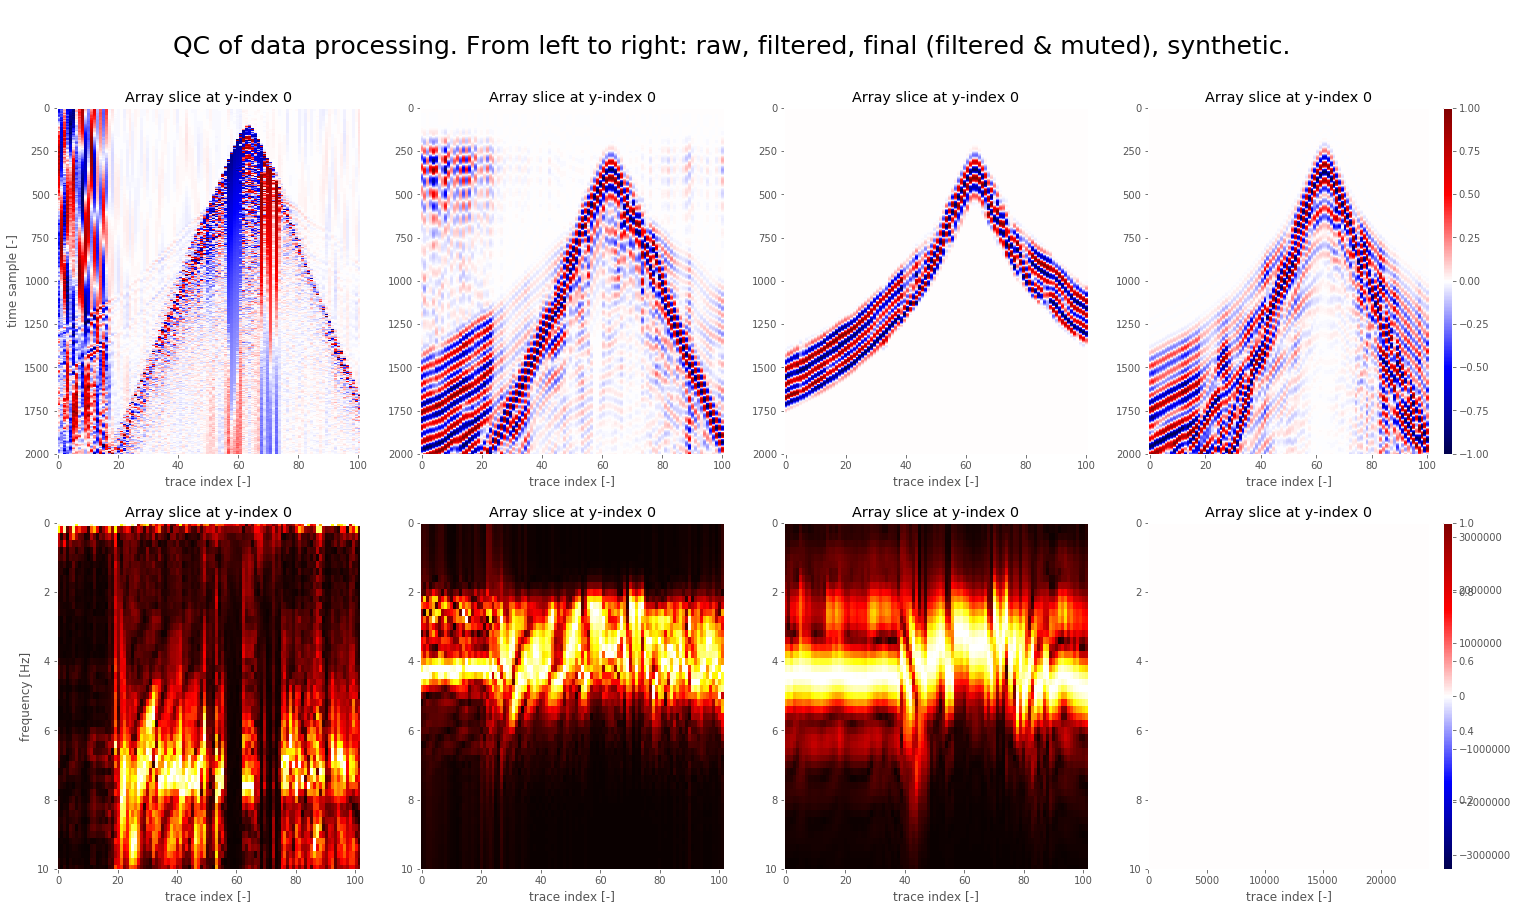

In [14]:
%%time
f01.run(steps=[4,5], twin=1, fmax=3, kw_filt=kw_filt)

# Synthetic-data inversion

### Synthetic models

#### Fig.
Anomaly no. 1. Cubic checquers

sizes [10 10 10] pads [[5, 5], [5, 5], [10, 10]] dxs [22.0, 22.0, 22.0]
Xi.shape, Ai.shape (341,) (341,)
Xi.shape, Ai.shape (361,) (361,)
Xi.shape, Ai.shape (81,) (81,)
CPU times: user 9.81 s, sys: 0 ns, total: 9.81 s
Wall time: 9.81 s


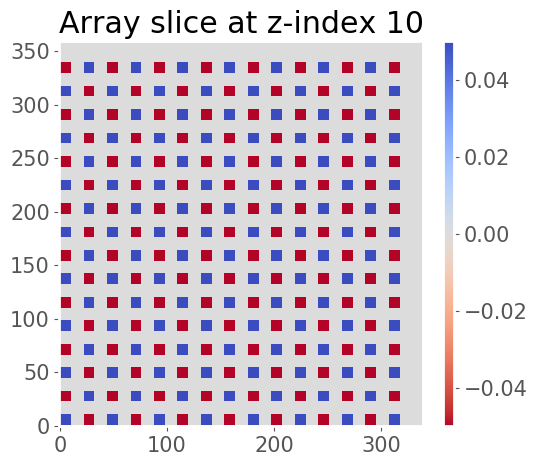

In [15]:
%%time 
from fwilight.seis import create_chqr
dims = box2dims(b01.box, d01['dx'])
sizes = np.array([10,10,10])
pads = [[5,5], [5,5], [10,10]]
ch = A3d(create_chqr(dims=dims, sizes=sizes, pads=pads))

fig = figure(7,5)
ax = ch.plot(10, unit='n', axis='z', aspect='equal', cmap='coolwarm_r')

sizes [10 10 10] pads [[5, 5], [5, 5], [10, 10]] dxs [22.0, 22.0, 22.0]
Xi.shape, Ai.shape (341,) (341,)
Xi.shape, Ai.shape (361,) (361,)
Xi.shape, Ai.shape (81,) (81,)
CPU times: user 9.78 s, sys: 8 ms, total: 9.79 s
Wall time: 9.79 s


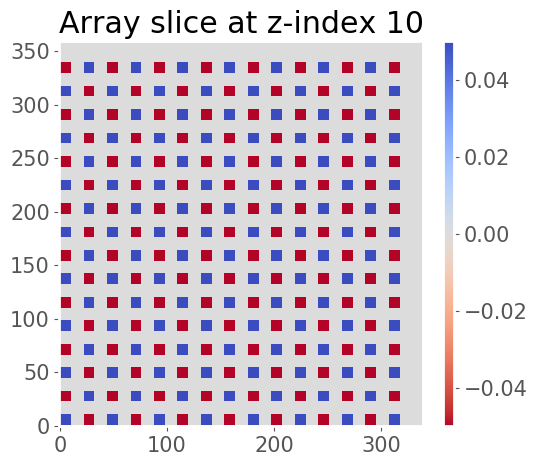

In [21]:
%%time 
from fwilight.seis import create_chqr
dims = box2dims(b01.box, d01['dx'])
sizes = np.array([10,10,10])
pads = [[5,5], [5,5], [10,10]]
ch = A3d(create_chqr(dims=dims, sizes=sizes, pads=pads))

fig = figure(7,5)
ax = ch.plot(10, unit='n', axis='z', aspect='equal', cmap='coolwarm_r')

#### Fig.
Anomaly no. 2. Gaussian checquers.

Warning. Non-integer index. Taking its floor
CPU times: user 952 ms, sys: 16 ms, total: 968 ms
Wall time: 266 ms


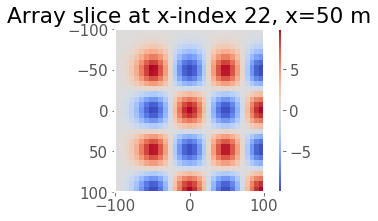

In [15]:
%%time 
a = Anom()
g = a.create(dims=(31,31,31), box=[-100,100,-100,100,-100,100], fwhm=40., Amax=11.,
         x0=-50, nx=9, dx=50,
         y0=-50, ny=9, dy=50,
         z0=-50, nz=9, dz=50)
figure(3,3)
ax = A3d(g).plot(50, unit='m', axis='x', cmap='coolwarm')

### Inversion strategy

#### Alg.
Checkerboard test.

In [30]:
# unc01 = FlowInvObsChq('unc01', path_eph)
unc01 = FlowInvObsChq('unc01', './')
lll(40)
unc01.run([0], box=b01.box, **d01, exp='proteus', precode='sp-316', fwicode='fw3d-690', ibmcode=None)

Step 000: Initialising synthetic and inversion projects.


In [69]:
unc01.syn.i.rm()

Content of /media/kmc3817/DATADRIVE1/heavy_PhD/PROJECTS/PhD-Santorini-FWI/notebooks/ch_kol/unc01syn/inp

total 678M
-rwxrwxrwx 1 root root  39M Jun 23 06:44 rm_unc01syn-BckgVp.mmp
-rwxrwxrwx 1 root root  39M Jun 23 06:44 rm_unc01syn-BckgVp.vtr
-rwxrwxrwx 1 root root  39M Jun 23 06:41 rm_unc01syn-AnomVp.mmp
-rwxrwxrwx 1 root root  39M Jun 23 06:41 rm_unc01syn-AnomVp.vtr
-rwxrwxrwx 1 root root 2.3K Jun 23 06:32 rm_unc01syn-Run1.pbs
-rwxrwxrwx 1 root root    0 Jun 23 06:32 rm_fullwave3d-verbose-slave-1
-rwxrwxrwx 1 root root    0 Jun 23 06:32 rm_fullwave3d-verbose-scheduler
-rwxrwxrwx 1 root root 2.3K Jun 23 06:32 rm_unc01syn-Run0.pbs
-rwxrwxrwx 1 root root 3.0K Jun 23 06:32 rm_unc01syn-Runfile.key
-rwxrwxrwx 1 root root 2.1K Jun 23 06:32 rm_unc01syn-SegyPrep.log
-rwxrwxrwx 1 root root  51K Jun 23 06:32 rm_unc01syn-Retained-Receivers.ps
-rwxrwxrwx 1 root root 8.1K Jun 23 06:32 rm_unc01syn-Retained-Sources.ps
-rwxrwxrwx 1 root root 1.7K Jun 23 06:32 rm_unc01syn-Skeleton.key
-rwxrwxrwx 1 ro

In [75]:
%%time 
lll(10)
unc01.run([1], data_fname='../../../ch_kol/p14-Observed.sgy', kw_chqr=dict(sizes=np.ones(3)*10,
                    pads=[[35,30], [35,30], [30,10]]),
      ztype='d', addtodepth=0, reciprocity=1, cat=0, b_abs=5, e_abs=10)

DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 0
Step 001: Preparing input for synthetic calculation.
DEBUG:fullwavepy.project.files.text.misc.RawSeisTxtFile._select_retained: Selecting the stations contained in the model box.


INFO:fullwavepy.project.files.text.misc.RawSeisTxtFile.create: No. of fnames selected: 1
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && cat .//unc01syn//inp/unc01syn-RawSeis.txt
DEBUG:fullwavepy.generic.system.bash: stdout:../../../ch_kol/p14-Observed.sgy



Content of  .//unc01syn//inp/unc01syn-RawSeis.txt : 
../../../ch_kol/p14-Observed.sgy
 
DEBUG:fullwavepy.ioapi.fw3d.save_vtr: File to save: .//unc01syn//inp/unc01syn-RawSign.vtr
DEBUG:fullwavepy.ioapi.segy.vtr2sgy: cmd: printf "yes
.//unc01syn//inp/unc01syn-RawSign.vtr


yes
" | vtr2sgy
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && printf "yes
.//unc01syn//inp/unc01syn-RawSign.vtr


yes
" | vtr2sgy
DEBUG:fullwavepy.generic.system.bash: Truncated stdout (after truncate= 150 chars):
VTR to SEG-Y file conversion  -  v1.31
****************************

Output traces by in-line then x-line? (default = yes) >> SEG-Y trace order will ...
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && segyread tape=.//unc01syn//inp/unc01syn-RawSign.sgy | sushw key=dt a=2500 | segyhdrs | segyclean | segywrite tape=.//unc01syn//inp/unc01syn-RawSign.sgy.tmp
DEBUG:fullwavepy.generic.system.bash: stderr:Truncated stderr (first 150 chars):3200+0 records in
6+1 records out
3200 bytes 

DEBUG:fullwavepy.generic.system.bash: stderr:Truncated stderr (first 150 chars):3200+0 records in
6+1 records out
3200 bytes (3.2 kB, 3.1 KiB) copied, 0.00189306 s, 1.7 MB/s

segyread: discrepant tr.ns = 0 with tape/user ns = 81
	...
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && mv .//unc01syn//inp/unc01syn-AnomVp.sgy.tmp .//unc01syn//inp/unc01syn-AnomVp.sgy
DEBUG:fullwavepy.ioapi.fw3d.save_vtr: File to save: .//unc01syn//inp/unc01syn-TrueVp.vtr
DEBUG:fullwavepy.ioapi.segy.vtr2sgy: cmd: printf "yes
.//unc01syn//inp/unc01syn-TrueVp.vtr


yes
" | vtr2sgy
DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && printf "yes
.//unc01syn//inp/unc01syn-TrueVp.vtr


yes
" | vtr2sgy
DEBUG:fullwavepy.generic.system.bash: Truncated stdout (after truncate= 150 chars):
VTR to SEG-Y file conversion  -  v1.31
****************************

Output traces by in-line then x-line? (default = yes) >> SEG-Y trace order will ...
DEBUG:fullwavepy.generic.system.bash: Command to run: cd 

DEBUG:fullwavepy.ioapi.generic.read_dict: File to read: .//unc01syn//inp/unc01syn-Runfile.key
DEBUG:fullwavepy.ioapi.generic.read_dict: Will convert all keys into lower case
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//inp/unc01syn-JobInfo0.log does not exist.
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//out/unc01syn-Out0.log does not exist.
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//out/unc01syn-Err0.log does not exist.
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//out/unc01syn-JobOut0.log does not exist.
DEBUG:fullwavepy.generic.system.exists: File: .//unc01syn//out/unc01syn-JobErr0.log does not exist.
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._set_resources: Queue selected: debug
DEBUG:fullwavepy.ioapi.generic.read_dict: File to read: .//unc01syn//inp/unc01syn-Runfile.key
DEBUG:fullwavepy.ioapi.generic.read_dict: Will convert all keys into lower case
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: No

DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating .//unc01syn//inp/fullwave3d-verbose-scheduler
DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating fullwave3d-verbose-slave-? for each mpiproc
DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating .//unc01syn//inp/fullwave3d-verbose-slave-1


DEBUG:fullwavepy.generic.system.bash: Command to run: cd ./ && cat .//unc01syn//inp/unc01syn-Run0.pbs
DEBUG:fullwavepy.generic.system.bash: Truncated stdout (after truncate= 150 chars):#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N unc...
Content of  .//unc01syn//inp/unc01syn-Run0.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N unc01syn
#PBS -o ../out/unc01syn-JobOut0.log
#PBS -e ../out/unc01syn-JobErr0.log
#PBS -l walltime=00:01:00
#PBS -l select=1:mpiprocs=2:ompthreads=4:ncpus=8:mem=96gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/unc01syn-Runfile.key   


DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating .//unc01syn//inp/fullwave3d-verbose-scheduler
DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating fullwave3d-verbose-slave-? for each mpiproc
DEBUG:fullwavepy.project.files.text.misc.JobFile._create_verbosity_triggers: Creating .//unc01syn//inp/fullwave3d-verbose-slave-1


DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 2
DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 3
DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 4
DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 5
DEBUG:fwilight.fwi.Flow._skip_step: Skipping step 6
CPU times: user 34.8 s, sys: 12.3 s, total: 47.2 s
Wall time: 2min 13s


In [93]:
unc01.syn.i.pbs.no[1].prep(select=9)

Content of  .//unc01syn//inp/unc01syn-Run1.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N unc01syn
#PBS -o ../out/unc01syn-JobOut1.log
#PBS -e ../out/unc01syn-JobErr1.log
#PBS -l walltime=01:00:00
#PBS -l select=9:mpiprocs=1:ompthreads=40:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/unc01syn-Runfile.key   
    rm $work_dir/unc01syn-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN=no # (DOES NOT

In [94]:
unc01.syn.i.rsync('my_eph')

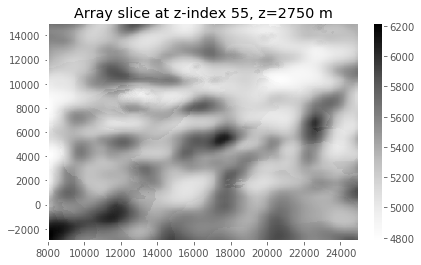

In [77]:
%mi
lll(40)
A3d(unc01.syn.i.tvp.read(overwite_mmp=1, overwrite=1)).plot(2750, unit='m', axis='z')

In [54]:
unc01.syn.i.ls()

Content of /media/kmc3817/DATADRIVE1/heavy_PhD/PROJECTS/PhD-Santorini-FWI/notebooks/ch_kol/unc01syn/inp

total 602M
-rwxrwxrwx 1 root root 2.3K Jun 23 06:32 unc01syn-Run1.pbs
-rwxrwxrwx 1 root root    0 Jun 23 06:32 fullwave3d-verbose-slave-1
-rwxrwxrwx 1 root root    0 Jun 23 06:32 fullwave3d-verbose-scheduler
-rwxrwxrwx 1 root root 2.3K Jun 23 06:32 unc01syn-Run0.pbs
-rwxrwxrwx 1 root root 3.0K Jun 23 06:32 unc01syn-Runfile.key
-rwxrwxrwx 1 root root 2.1K Jun 23 06:32 unc01syn-SegyPrep.log
-rwxrwxrwx 1 root root  51K Jun 23 06:32 unc01syn-Retained-Receivers.ps
-rwxrwxrwx 1 root root 8.1K Jun 23 06:32 unc01syn-Retained-Sources.ps
-rwxrwxrwx 1 root root 1.7K Jun 23 06:32 unc01syn-Skeleton.key
-rwxrwxrwx 1 root root  998 Jun 23 06:32 unc01syn-SourceSig-Time.log
-rwxrwxrwx 1 root root 1.2K Jun 23 06:32 unc01syn-Signature.hed
-rwxrwxrwx 1 root root  408 Jun 23 06:32 unc01syn-Signature.idx
-rwxrwxrwx 1 root root 133K Jun 23 06:32 unc01syn-Signature.sgy
-rwxrwxrwx 1 root root  12K Jun 23 06

In [89]:
a = unc01.syn.i.tvp.anom.read()
b = unc01.syn.i.tvp.bckg.read()
c = unc01.syn.i.tvp.read(overwrite=1, overwrite_mmp=1)

In [85]:
unc01.syn.i.tvp.create(b + b*a)

<IPython.core.display.Javascript object>


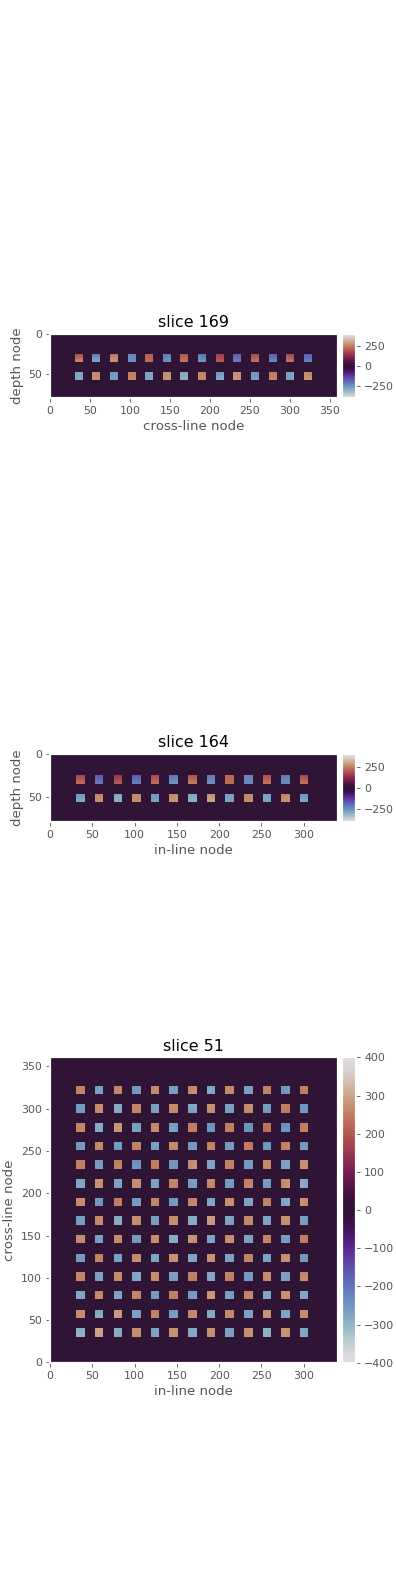

6

In [91]:
%mn
%mn
fig = plt.figure(figsize=(5,20))
tracker = A3d(c-b).scrollall(fig, vmin=-400, vmax=400)
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

<IPython.core.display.Javascript object>


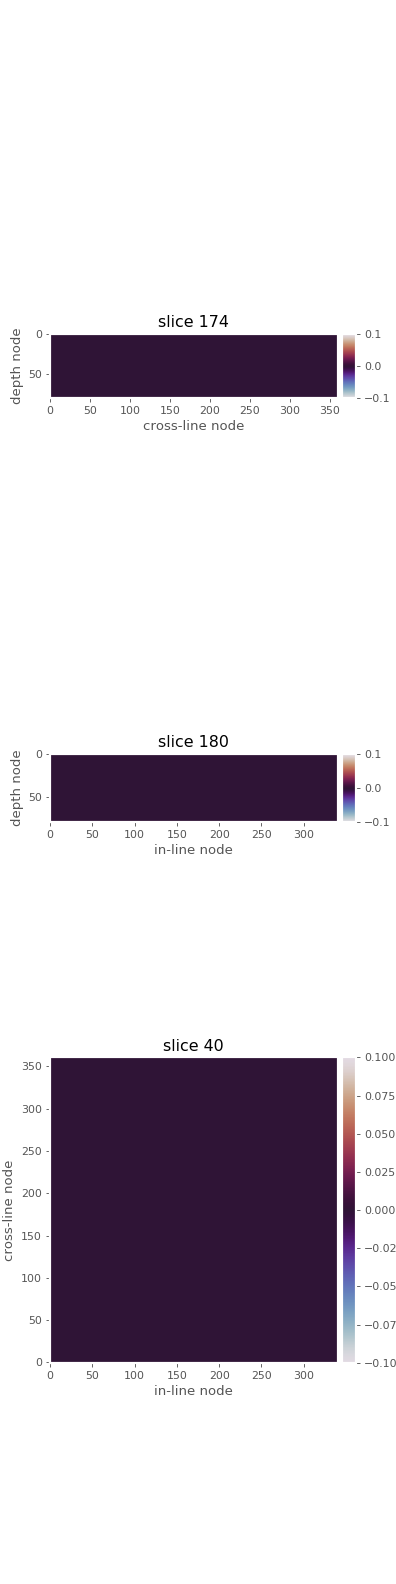

6

In [81]:
%mn
%mn
fig = plt.figure(figsize=(5,20))
tracker = A3d(a).scrollall(fig, vmin=-.1, vmax=.1)
fig.canvas.mpl_connect('scroll_event', tracker.onscroll)

#### Tab.
Smoothing of `p14` was 2, 2, 1.

In [17]:
p14.i.rnf.cat()

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//p14//inp/p14-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : tomography
     domain        : time
     dim           : 3d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 341
     nx2           : 361
     nx3           : 81 
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 16
     nshots        : 16
     nrecs         : 1481
     maxrc         : 1144
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     btop          : 0
     bbot          : 40
     bleft         : 40
     bright        : 40
     bfront        : 40
     bback         : 40
     
     etop          : 0
     ebot          : 50
     elef      

### Parameter tuning

# Field-data inversion

### *Set-up*

#### Alg.
Project `p14` -- finishing the FWI already run for 87 iterations (up to 4.5 Hz). Copy from RDS/home to RDS/ephemeral. 

In [38]:
%%time
lll(40) # set logging level to WARNINGS and ERRORs only
path = '/home/kmc3817/c_projects_phd/fwi_sant_kolumbo/'
p14 = ProjInv('p14', path=path_eph, box=b01.box, **d01, cat=0, exe=exe_690) # Lasso selected.

CPU times: user 148 ms, sys: 24 ms, total: 172 ms
Wall time: 340 ms


In [36]:
p14.nx3

81

In [31]:
p14.i.rnf.cat()

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//p14//inp/p14-Runfile.key : 

    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : tomography
     domain        : time
     dim           : 3d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 341
     nx2           : 361
     nx3           : 201.0
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 16
     nshots        : 16
     nrecs         : 1481
     maxrc         : 1144
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     btop          : 0
     bbot          : 40
     bleft         : 40
     bright        : 40
     bfront        : 40
     bback         : 40
     
     etop          : 0
     ebot          : 50
     elef    

In [24]:
!cat {path}/p14/inp/p14-LastCheckpoint.txt

          87


In [40]:
!cat {path}/p14/inp/p14-Runfile.key


    ! May 2019, K. Chrapkiewicz 
    ! THIS RUNFILE CONFORMS TO
    ! FULLWAVE REV. 688 STANDARD
    
    
    ! A. PROBLEM DEFINITION
     problem       : tomography
     domain        : time
     dim           : 3d
     equation      : acoustic
     units         : metric
     anisotropy    : none
     kernel        : low
    
     
    ! B. MODEL DEFINITION
     nx1           : 341
     nx2           : 361
     nx3           : 81
     dx            : 50.0000000
    
     
    ! C. DATA DEFINITION
     ncomp         : 16
     nshots        : 16
     nrecs         : 1481
     maxrc         : 1144
     maxps         : 1
     io            : segy
    
     
    ! D. BOUNDARY CONDITIONS
     btop          : 0
     bbot          : 40
     bleft         : 40
     bright        : 40
     bfront        : 40
     bback         : 40
     
     etop          : 0
     ebot          : 50
     elef          : 50
     erig          : 50
     efro          : 50
     ebac          : 50
    
     
  

In [39]:
!cp {path}/p14/inp/* {p14.inp.path}
!cp {path}/p14/out/p14-CP00087-* {p14.out.path}
!cp {path}/p14/inp/p14-Out.log {path}/p14/inp/p14-Out1.log 
!cp {path}/p14/inp/p14-Err.log {path}/p14/inp/p14-Err1.log 
!cp {path}/p14/inp/p14-Run.pbs {path}/p14/inp/p14-Run1.pbs 
!cp {path}/p14/inp/p14-Out.log {p14.out.path}/p14-Out1.log 
!cp {path}/p14/inp/p14-Err.log {p14.out.path}/p14-Err1.log 
!cp {path}/p14/inp/p14-Run.pbs {p14.out.path}/p14-Run1.pbs 

In [28]:
!ls /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol/p14/out

p14-CP00087-Runfile.key  p14-CP00087-Vp.sgy  p14-Err1.log  p14-Run1.pbs
p14-CP00087-Vp.mmp	 p14-CP00087-Vp.vtr  p14-Out1.log


In [60]:
p14.o.o.no[0].cat()

Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//p14//out/p14-Out0.log : 
# mpiexec: RDMA network found -- using rdma+shared memory (I_MPI_DEVICE=rdssm:ofa-v2-ib0)
# mpiexec: full path to program is /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe
# mpiexec: program arguments are: p14 -1 4
# mpiexec: 2 ranks allocated via PBS select
# mpiexec: 4 OpenMP threads / rank allocated by PBS select
# mpiexec: Job has shared use of the allocated nodes. Disabling process-pinning
# mpiexec: machinefile configured as:
cx2-5-4-6.cx2.hpc.ic.ac.uk:2
#
# mpiexec: Checking all nodes are ONLINE:
# mpiexec: All nodes appear ONLINE
# mpiexec: launch started at Sun 20 Jun 11:01:19 BST 2021
# mpiexec: launching program...
# /rds/general/user/kmc3817/home/PhD/fullwave3D/rev690/bin/fullwave3D.exe p14 -1 4
(cx2-5-4-6.cx2.hpc.ic.ac.uk:0,1)
---=== Starting run (host: cx2-5-4-6.cx2.hpc.ic.ac.uk) on 2021/06/20, 11:01:27 ===---
executable: fullwave3D.exe, version: unknown, rel

In [62]:
p14.o.ls()

Content of /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol/p14/out

total 2.9G
-rwx------ 1 kmc3817 root  33K Jun 20 11:31 p14-Out2.log
-rwx------ 1 kmc3817 root  23M Jun 20 11:31 p14-SLAVES_DUMPCOMPARE-csref04124-iter00090fwd1.ttr
-rwx------ 1 kmc3817 root  22M Jun 20 11:31 p14-SLAVES_DUMPCOMPARE-csref04138-iter00090fwd1.ttr
-rwx------ 1 kmc3817 root  22M Jun 20 11:31 p14-SLAVES_DUMPCOMPARE-csref04157-iter00090fwd1.ttr
-rwx------ 1 kmc3817 root  21M Jun 20 11:31 p14-SLAVES_DUMPCOMPARE-csref04110-iter00090fwd1.ttr
-rwx------ 1 kmc3817 root  24M Jun 20 11:31 p14-SLAVES_DUMPCOMPARE-csref04177-iter00090fwd1.ttr
-rwx------ 1 kmc3817 root  25M Jun 20 11:31 p14-SLAVES_DUMPCOMPARE-csref04158-iter00090fwd1.ttr
-rwx------ 1 kmc3817 root  25M Jun 20 11:31 p14-SLAVES_DUMPCOMPARE-csref04123-iter00090fwd1.ttr
-rwx------ 1 kmc3817 root  21M Jun 20 11:31 p14-SLAVES_DUMPCOMPARE-csref04137-iter00090fwd1.ttr
-rwx------ 1 kmc3817 root   13 Jun 20 11:29 p14-LastCheckpoint.txt
-rwx------ 1 kmc3817 root

#### Alg.
Schedule jobs on the cx1 cluster.

In [29]:
lll(20)
# p14.i.pbs.no[0].prep(q='debug')
p14.i.pbs.no[2].prep(select=9, hours=24)
# p14.i.pbs.no[3].prep(select=9, hours=4) # about 5 iters / hour
# p14.i.pbs.no[4].prep(select=5, hours=10)
# p14.i.pbs.no[5].prep(select=9, hours=10)

INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._set_resources: Queue selected: pqmrwarn
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: No. of shots in the runfile (ncomp): 16
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: mpiprocs not specified. It will be chosen to maximize a decimal part of nshots / (mpiprocs-1) for a given select=
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: Max. decimal place 0.9411764705882353 is for mpiprocs: 2 and ompthreads: 20
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: There are mpiprocs value(s) that give integer: nshots / (mpiprocs-1)
INFO:fullwavepy.ioapi.clusters.cx1.PbsFileCx1._find_optimal_resources: mpiprocs: 1, ompthreads: 40


Content of  /home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//p14//inp/p14-Run2.pbs : 
#!/bin/bash

##
# FULLWAVE3D WILL BE RUN FROM proj/out/
# For more explanation, see help(fullwavepy.project.files.runfiles.PbsFile).
#
##

#PBS -N p14
#PBS -o ../out/p14-JobOut2.log
#PBS -e ../out/p14-JobErr2.log
#PBS -l walltime=24:00:00
#PBS -l select=9:mpiprocs=1:ompthreads=40:ncpus=40:mem=128gb
#PBS -l place=scatter:excl

start=`date +%s`

    # PATHS
    code_path=~/PhD/fullwave3D/rev690/bin/fullwave3D.exe
    echo 'code_path: '${code_path}

    work_dir=$PBS_O_WORKDIR/../out/ # $PBS_O_WORKDIR IS THE ONE CONTAINING THIS SCRIPT
    
    # CAVEAT  
    rm $work_dir/p14-Runfile.key   
    rm $work_dir/p14-Ghost.*


    # HARD-LINK INPUT FILES TO OUTPUT DIR WHERE THE CODE WILL RUN
    ln $PBS_O_WORKDIR/* $work_dir
    
    # CHANGE DIRECTORY TO PROJECT OUTPUT
    cd $work_dir
    
    
# DISABLE PINNING OF THE PROCESSES (MAKE ALL NODE CORES AVAILABLE TO ALL PROCESSES)
unset NCPUS
export I_MPI_PIN

### Objective function

#### Fig.

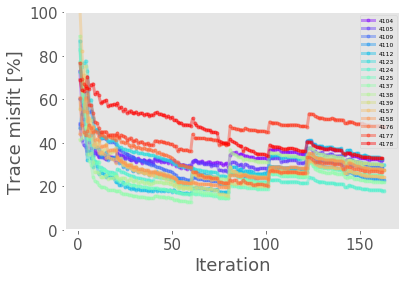

In [15]:
p14.o.fit.plot(run_ids=[1,2,3,4,5])

In [15]:
p14.o.fit.plot(run_ids=[1,2,3,4,5])

FileNotFoundError: [Errno 2] No such file or directory: '/home/kmc3817/rds_home/my_ephemeral/PROJECTS/ch_kol//p14//inp/p14-Sources.geo'

### Data fit

#### Fig. 
OBS 4157

##### a) 
Iteration 1.

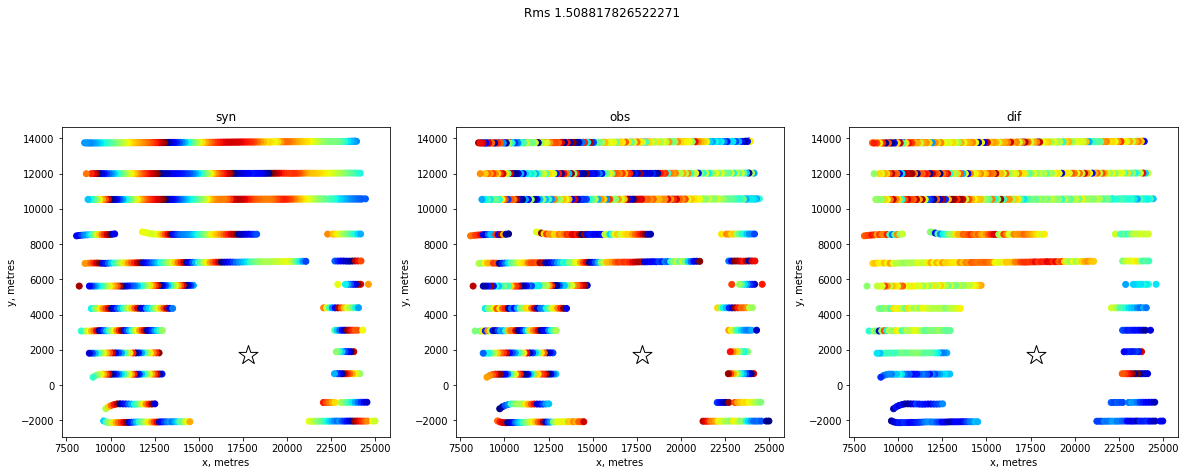

In [543]:
p14.out.dumpcomp.it[1][4157].plot_phase(freq=3)

##### b) 
Iteration 80.

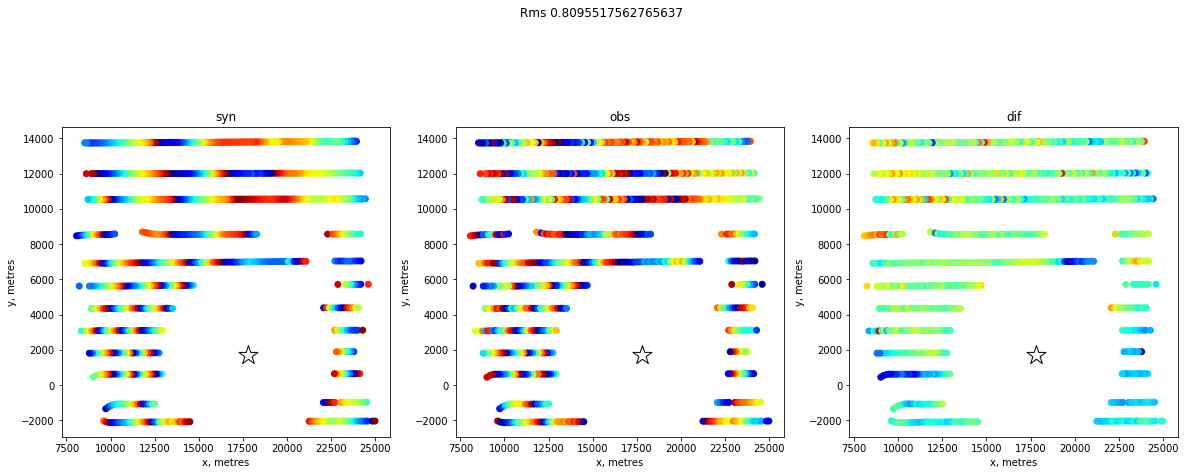

In [544]:
p14.out.dumpcomp.it[80][4157].plot_phase(freq=3)

#### Fig. 
OBS 4104

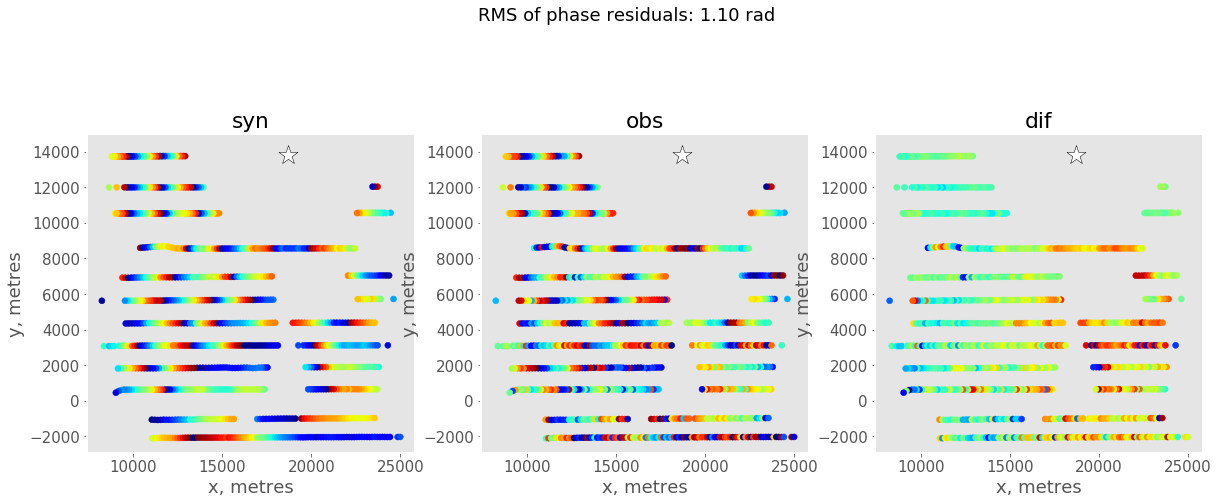

In [22]:
p14.o.dc.it[88][4104].plot_phase(freq=3)

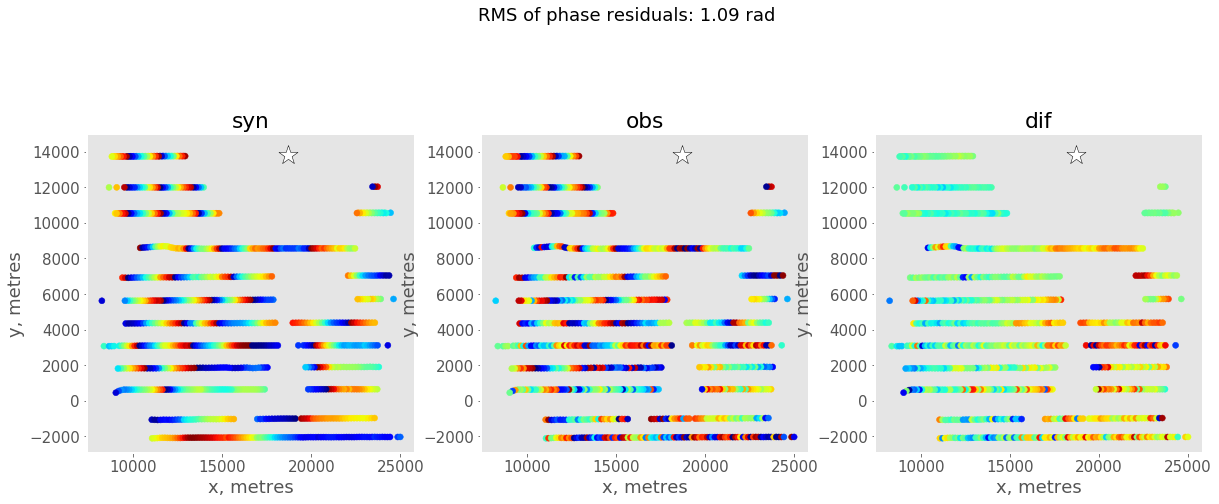

In [20]:
p14.o.dc.it[93][4104].plot_phase(freq=3)

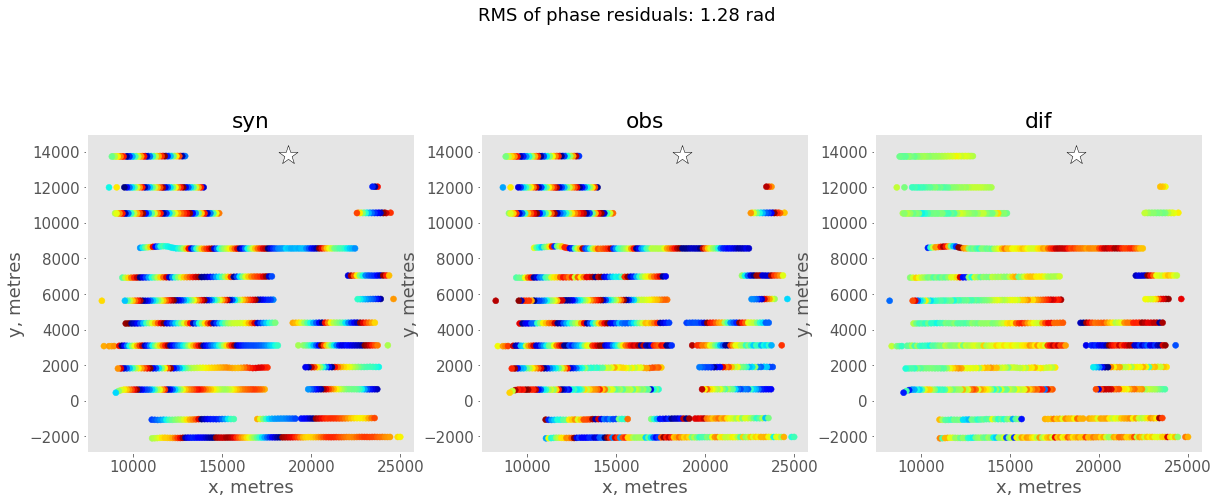

In [24]:
p14.o.dc.it[88][4104].plot_phase(freq=5)

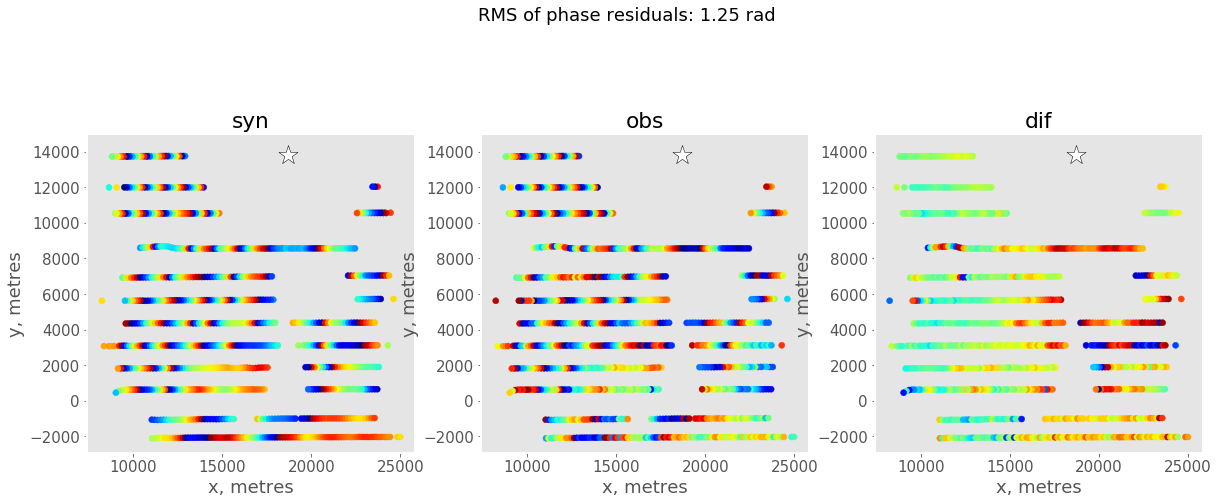

In [23]:
p14.o.dc.it[93][4104].plot_phase(freq=5)

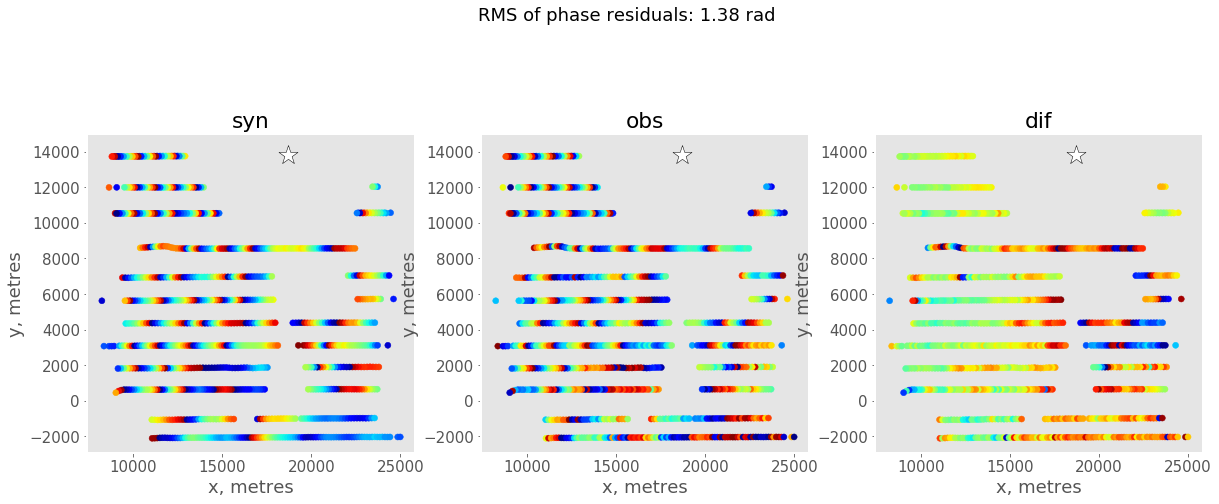

In [18]:
p14.o.dc.it[132][4104].plot_phase(freq=5)

# ...